## Sampling

In [1]:
import numpy as np
import pandas as pd
df_sample=pd.read_csv(r"C:\Users\23059\OneDrive\Desktop\Amiira\Y3S1\fyp\sample.csv")

In [2]:
df_sample

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,259,CASH_OUT,246917.44,C1498821826,0.00,0.00,C1385924981,3175848.97,3422766.41,0,0
1,161,CASH_IN,165577.48,C1959842869,242080.31,407657.78,C125997794,653770.69,488193.21,0,0
2,331,PAYMENT,11147.81,C690176304,21271.00,10123.19,M1395131038,0.00,0.00,0,0
3,304,PAYMENT,3758.44,C1065078045,0.00,0.00,M1924230681,0.00,0.00,0,0
4,355,CASH_OUT,295770.07,C278303549,0.00,0.00,C1920150261,429733.98,725504.05,0,0
...,...,...,...,...,...,...,...,...,...,...,...
699995,400,PAYMENT,12484.57,C2051987337,0.00,0.00,M1300803541,0.00,0.00,0,0
699996,187,PAYMENT,27274.11,C404473655,10231.00,0.00,M700503255,0.00,0.00,0,0
699997,225,PAYMENT,29426.83,C1350671817,49601.00,20174.17,M161969198,0.00,0.00,0,0
699998,354,CASH_OUT,21747.21,C1288280262,3309.24,0.00,C929278329,58996.31,80743.52,0,0


In [5]:
df_sample_first_4_cols = df_sample.iloc[:, :3] # extract first 4 columns
last_col = df_sample.iloc[:, -1] # extract last column
df_concatenated = pd.concat([df_sample_first_4_cols, last_col], axis=1) # concatenate first 4 columns and last column

In [71]:
import pandas as pd

# define the bins for 'step' column
step_bins = [0, 100, 200, 300, 400, 500, 600, 700, 743]
step_labels = ['0-100', '101-200', '201-300', '301-400', '401-500', '501-600', '601-700', '701-743']

# bin 'step' column using pd.cut() function
df_sample['step_binned'] = pd.cut(df_sample['step'], bins=step_bins, labels=step_labels, include_lowest=True)

# define the bins for 'amount' column
amount_bins = [0, 1000000, 5000000, 10000000, 20000000, 50000000, 100000000]
amount_labels = ['0-1M', '1M-5M', '5M-10M', '10M-20M', '20M-50M', '50M-100M']

# bin 'amount' column using pd.cut() function
df_sample['amount_binned'] = pd.cut(df_sample['amount'], bins=amount_bins, labels=amount_labels, include_lowest=True)

In [74]:
df_sample

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,nameDest,nameOrig,isFraud,step_binned,amount_binned
0,177,PAYMENT,2.872640e+03,1.999100e+04,17118.36,0.000000e+00,0.000000e+00,0,308974,582435,NoFraud,101-200,0-1M
1,242,PAYMENT,8.016220e+03,8.537100e+04,77354.78,0.000000e+00,0.000000e+00,0,263971,525702,NoFraud,201-300,0-1M
2,393,PAYMENT,6.847520e+03,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0,488026,261499,NoFraud,301-400,0-1M
3,261,CASH_OUT,2.264529e+04,0.000000e+00,0.00,1.041777e+06,1.064423e+06,0,176263,113349,NoFraud,201-300,0-1M
4,306,CASH_OUT,4.014498e+04,1.428200e+04,0.00,5.004869e+04,9.019367e+04,0,230752,110492,NoFraud,301-400,0-1M
...,...,...,...,...,...,...,...,...,...,...,...,...,...
489379,102,CASH_OUT,1.963954e+05,1.963954e+05,0.00,1.219585e+05,3.183539e+05,0,215058,432194,Fraud,101-200,0-1M
489380,738,TRANSFER,6.315831e+06,6.315831e+06,0.00,0.000000e+00,0.000000e+00,0,116125,193319,Fraud,701-743,5M-10M
489381,279,TRANSFER,2.326723e+06,2.326723e+06,0.00,0.000000e+00,0.000000e+00,0,82386,304825,Fraud,201-300,1M-5M
489382,569,CASH_OUT,1.532052e+05,1.532052e+05,0.00,2.565880e+06,2.719086e+06,0,212036,175257,Fraud,501-600,0-1M


In [77]:
import pandas as pd

# select columns A and C
df_H = pd.DataFrame(df_sample, columns=['type', 'step_binned','amount_binned','isFraud'])

df_H.dtypes

type               object
step_binned      category
amount_binned    category
isFraud            object
dtype: object

In [78]:
# Check the data types of columns
print(df_H.dtypes)

# Change data types to object
df_H = df_H .astype('object')

# Check the data types of columns after conversion
print(df_H.dtypes)

type               object
step_binned      category
amount_binned    category
isFraud            object
dtype: object
type             object
step_binned      object
amount_binned    object
isFraud          object
dtype: object


In [ ]:
import pandas as pd

# select columns A and C
df_new1 = pd.DataFrame(df_sample, columns=['type', 'step_binned','amount_binned','isFraud'])

print(df_new1)

In [73]:
import pandas as pd

# Assuming your dataframe is named "df"
df_sample["isFraud"] = df_sample["isFraud"].replace({0: "NoFraud", 1: "Fraud"})

In [32]:
import pandas as pd

# select columns A and C
df_new1 = pd.DataFrame(df_sample, columns=['type', 'nameOrig','nameDest','isFraud'])

print(df_new1)

            type     nameOrig     nameDest  isFraud
0       CASH_OUT  C1498821826  C1385924981        0
1        CASH_IN  C1959842869   C125997794        0
2        PAYMENT   C690176304  M1395131038        0
3        PAYMENT  C1065078045  M1924230681        0
4       CASH_OUT   C278303549  C1920150261        0
...          ...          ...          ...      ...
699995   PAYMENT  C2051987337  M1300803541        0
699996   PAYMENT   C404473655   M700503255        0
699997   PAYMENT  C1350671817   M161969198        0
699998  CASH_OUT  C1288280262   C929278329        0
699999  CASH_OUT  C2083088314  C2117904231        0

[700000 rows x 4 columns]


In [21]:
# convert column A from int to object
df_new['isFraud'] = df_new['isFraud'].astype('object')

In [33]:
import pandas as pd

# Assuming your dataframe is named "df"
df_new["isFraud"] = df_new["isFraud"].replace({0: "NoFraud", 1: "Fraud"})

In [81]:
K_means_df

,type,step_cluster,amount_cluster,isFraud_cluster
0,PAYMENT,1-186,Low,1
1,PAYMENT,187-372,Low,1
2,PAYMENT,373-558,Low,1
3,CASH_OUT,187-372,Low,1
4,CASH_OUT,187-372,Low,1
...,...,...,...,...
489379,CASH_OUT,1-186,Medium,0
489380,TRANSFER,559-743,Higher,0
489381,TRANSFER,187-372,High,0
489382,CASH_OUT,559-743,Medium,0


In [26]:
df_new.dtypes

type        object
nameOrig    object
nameDest    object
isFraud     object
dtype: object

In [34]:
df_new

,type,nameOrig,nameDest,isFraud
0,CASH_OUT,C1498821826,C1385924981,NoFraud
1,CASH_IN,C1959842869,C125997794,NoFraud
2,PAYMENT,C690176304,M1395131038,NoFraud
3,PAYMENT,C1065078045,M1924230681,NoFraud
4,CASH_OUT,C278303549,C1920150261,NoFraud
...,...,...,...,...
699995,PAYMENT,C2051987337,M1300803541,NoFraud
699996,PAYMENT,C404473655,M700503255,NoFraud
699997,PAYMENT,C1350671817,M161969198,NoFraud
699998,CASH_OUT,C1288280262,C929278329,NoFraud


In [8]:
df_concatenated

,step,type,amount,isFlaggedFraud
0,Medium-Low,CASH_OUT,Medium-Low,0
1,Low,CASH_IN,Medium-Low,0
2,Medium-Low,PAYMENT,Very Low,0
3,Medium-Low,PAYMENT,Very Low,0
4,Medium-Low,CASH_OUT,Medium-Low,0
...,...,...,...,...
699995,Medium-High,PAYMENT,Very Low,0
699996,Medium-Low,PAYMENT,Very Low,0
699997,Medium-Low,PAYMENT,Very Low,0
699998,Medium-Low,CASH_OUT,Very Low,0


In [10]:
# Check the data types of columns
print(df_concatenated.dtypes)

# Change data types to object
df_concatenated = df_concatenated .astype('object')

# Check the data types of columns after conversion
print(df_concatenated .dtypes)

step              category
type                object
amount            category
isFlaggedFraud       int64
dtype: object
step              object
type              object
amount            object
isFlaggedFraud    object
dtype: object


In [9]:
df_concatenated.dtypes

step              category
type                object
amount            category
isFlaggedFraud       int64
dtype: object

In [45]:
# select the first 100 columns
df_first_100_rows = df_new.iloc[:100]
df_first_100_rows

,type,nameOrig,nameDest,isFraud
0,CASH_OUT,C1498821826,C1385924981,NoFraud
1,CASH_IN,C1959842869,C125997794,NoFraud
2,PAYMENT,C690176304,M1395131038,NoFraud
3,PAYMENT,C1065078045,M1924230681,NoFraud
4,CASH_OUT,C278303549,C1920150261,NoFraud
...,...,...,...,...
95,CASH_IN,C529388426,C1291733377,NoFraud
96,CASH_IN,C1529414879,C1950771663,NoFraud
97,TRANSFER,C605982374,C1225616405,NoFraud
98,CASH_IN,C2075901130,C2093043617,NoFraud


In [79]:
df_H

,type,step_binned,amount_binned,isFraud
0,PAYMENT,101-200,0-1M,NoFraud
1,PAYMENT,201-300,0-1M,NoFraud
2,PAYMENT,301-400,0-1M,NoFraud
3,CASH_OUT,201-300,0-1M,NoFraud
4,CASH_OUT,301-400,0-1M,NoFraud
...,...,...,...,...
489379,CASH_OUT,101-200,0-1M,Fraud
489380,TRANSFER,701-743,5M-10M,Fraud
489381,TRANSFER,201-300,1M-5M,Fraud
489382,CASH_OUT,501-600,0-1M,Fraud


In [80]:
from chefboost import Chefboost as chef
import pandas as pd

config = {'algorithm': 'CHAID','min_samples_split': 2,'learning_rate':0.1,'enableParallelism': False}
model = chef.fit(df_H, config = config, target_label = 'isFraud')
print(model)

CHAID  tree is going to be built...
-------------------------
finished in  9.728413343429565  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  86.06309156000196 % on  489384  instances
Labels:  ['NoFraud' 'Fraud']
Confusion matrix:  [[314985, 33630], [34575, 106194]]
Precision:  90.3533 %, Recall:  90.109 %, F1:  90.231 %
{'trees': [<module 'outputs/rules/rules' from 'C:\\Users\\23059\\OneDrive\\Desktop\\FinalYearProject\\outputs/rules/rules.py'>], 'alphas': [], 'config': {'algorithm': 'CHAID', 'min_samples_split': 2, 'learning_rate': 0.1, 'enableParallelism': False, 'enableRandomForest': False, 'num_of_trees': 5, 'enableMultitasking': False, 'enableGBM': False, 'epochs': 10, 'max_depth': 3, 'enableAdaboost': False, 'num_of_weak_classifier': 4, 'num_cores': 4}, 'nan_values': []}


In [7]:
import pandas as pd

# assuming your dataframe is named df_concatenated

# convert 'step' column to ordinal categories
df_concatenated['step'] = pd.cut(df_concatenated['step'], bins=[-1, 186, 372, 558, 743], labels=['Low', 'Medium-Low', 'Medium-High', 'High'])

# convert 'amount' column to nominal categories
df_concatenated['amount'] = pd.cut(df_concatenated['amount'], bins=[-1, 50000, 100000, 500000, 1000000, 5000000, 10000000, 60000000], labels=['Very Low', 'Low', 'Medium-Low', 'Medium', 'Medium-High', 'High', 'Very High'])

In [ ]:
print(df_sample.dtypes)

In [48]:
from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# label = le.fit_transform(df_sample['type'])
# label
# df_sample.drop("type", axis=1, inplace=True)
# df_sample["type"] = label

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df_sample['nameDest'])
label
df_sample.drop("nameDest", axis=1, inplace=True)
df_sample["nameDest"] = label

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df_sample['nameOrig'])
label
df_sample.drop("nameOrig", axis=1, inplace=True)
df_sample["nameOrig"] = label

In [49]:
df_sample

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,nameDest,nameOrig
0,259,CASH_OUT,246917.44,0.00,0.00,3175848.97,3422766.41,0,0,51184,181039
1,161,CASH_IN,165577.48,242080.31,407657.78,653770.69,488193.21,0,0,34391,347697
2,331,PAYMENT,11147.81,21271.00,10123.19,0.00,0.00,0,0,304528,587476
3,304,PAYMENT,3758.44,0.00,0.00,0.00,0.00,0,0,369290,23581
4,355,CASH_OUT,295770.07,0.00,0.00,429733.98,725504.05,0,0,121755,438334
...,...,...,...,...,...,...,...,...,...,...,...
699995,400,PAYMENT,12484.57,0.00,0.00,0.00,0.00,0,0,292816,380945
699996,187,PAYMENT,27274.11,10231.00,0.00,0.00,0.00,0,0,455832,483984
699997,225,PAYMENT,29426.83,49601.00,20174.17,0.00,0.00,0,0,331919,127023
699998,354,CASH_OUT,21747.21,3309.24,0.00,58996.31,80743.52,0,0,246709,104457


In [50]:
df_sample['type'] = df_sample['type'].replace({'CASH_OUT': 0, 'CASH_IN': 1, 'PAYMENT': 2, 'TRANSFER': 3, 'DEBIT': 4})

In [51]:
unique_types = df_sample['type'].unique()

In [52]:
unique_types_list = list(unique_types)
unique_types_list

[0, 1, 2, 3, 4]

In [53]:
X = df_sample.drop('isFraud', axis=1)
# Separate the target variable
y = df_sample['isFraud']

In [54]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

#Upsampling via SMOTE
smote = SMOTE(sampling_strategy=0.2, random_state=0)

#Downsample via RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=0.4, random_state=0)

#Application of the resampling methods
X_resampled, y_resampled = smote.fit_resample(X, y)
X_resampled, y_resampled = rus.fit_resample(X_resampled, y_resampled)

In [55]:
# from imblearn.over_sampling import SMOTE

# #Upsampling via SMOTE
# smote = SMOTE(sampling_strategy=0.55, random_state=0)

# # Fit and apply the resampler to the entire dataset
# X_resampled, y_resampled = smote.fit_resample(X, y)

In [56]:
# assuming your dataframe is named df_sample
amount_min = df_sample['amount'].min()
amount_max = df_sample['amount'].max()

print("Minimum amount:", amount_min)
print("Maximum amount:", amount_max)

Minimum amount: 0.0
Maximum amount: 69886731.3


In [57]:
counts = y_resampled.value_counts()
print(counts)

0    349560
1    139824
Name: isFraud, dtype: int64


In [58]:
# combine X_resampled and y_resampled back to a dataframe
df_sample = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['isFraud'])], axis=1)

In [59]:
reverse_map = {0: 'CASH_OUT', 1: 'CASH_IN', 2: 'PAYMENT', 3: 'TRANSFER', 4: 'DEBIT'}
df_sample['type'] = df_sample['type'].replace(reverse_map)

Nominal dataframe

In [60]:
# Count the number of occurrences of 0 and 1
counts = df_sample['isFraud'].value_counts()

# Print the counts
print("Number of 0s:", counts[0])
print("Number of 1s:", counts[1])

Number of 0s: 349560
Number of 1s: 139824


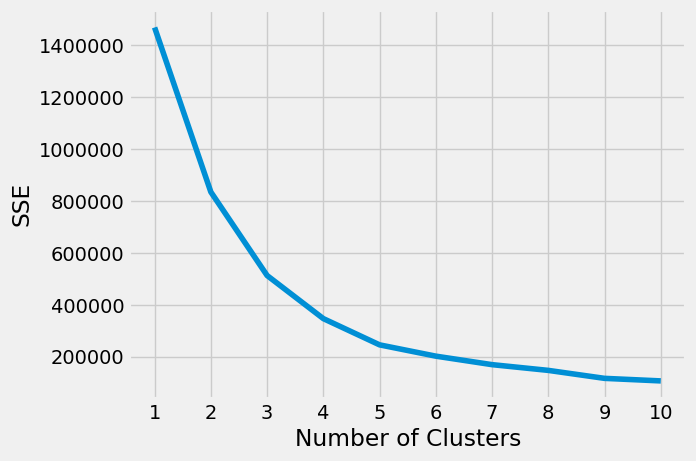

The bin edges for step are [-inf, 186, 372, 558, inf]
The bin edges for amount are [0, 50000, 100000, 500000, 1000000, 5000000, 10000000, 60000000, 80000000]


In [61]:
from sklearn.cluster import KMeans

# This code transforms the continuous variables (step and amount) taking into account ‘isFraud Class’ which is the objective  
# of this research. A k-means cluster model with 3 features, ‘isFraud’, ‘step’ and ‘amount’ is used.
# The variables ‘step_cluster’ and ‘amount_cluster’ are created for every single transaction.

continuous_vars = ['step','amount','isFraud']

# Normalizing the data
normalized_df = (df_sample[continuous_vars] - df_sample[continuous_vars].mean()) / df_sample[continuous_vars].std()

# Determining the optimal number of clusters
kmeans_kwargs = {"init": "random", "n_init": 10, "max_iter": 50, "random_state": 42}
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(normalized_df)
    sse.append(kmeans.inertia_)
    
# Application of th elbow method 
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

# Application of K-Means clustering
kmeans = KMeans(n_clusters=3, **kmeans_kwargs)
kmeans.fit(normalized_df)
clusters = kmeans.predict(normalized_df)

# Using K-Means clustering to create clusters for the continuous variables "step", "amount" while taking "isFraud" into consideration
cluster_df = pd.DataFrame()
for var in continuous_vars:
    cluster_centers = kmeans.cluster_centers_[:, continuous_vars.index(var)]
    col_name = var + '_cluster'
    cluster_df[col_name] = kmeans.predict(normalized_df)
    
    # Replace cluster labels with desired values
    
    # No change is performed on 'isFraud variable'.
    if var == 'isFraud':
        cluster_df[col_name] = cluster_df[col_name].apply(lambda x: 1 if x == 1 else 0)
        
    elif var=='amount':
        bin_edges = [0, 50000, 100000, 500000, 1000000, 5000000, 10000000, 60000000, 80000000]
        cluster_labels = ['0-50k', '50k-100k', '100k-500k', '500k-1M', '1M-5M', '5M-10M', '10M-60M', '60M-80M']
        cluster_df[col_name] = pd.cut(df_sample['amount'], bins=bin_edges, labels=cluster_labels)
        print(f"The bin edges for amount are {bin_edges}")
   
    elif var == 'step':
        bin_edges = [-np.inf, 186, 372, 558, np.inf] 
        cluster_labels = ['1-186', '187-372', '373-558', '559-743']
        cluster_df[col_name] = pd.cut(df_sample['step'], bins=bin_edges, labels=cluster_labels)
        print(f"The bin edges for step are {bin_edges}")

# Create new dataframe to store the converted values
K_means_df = pd.DataFrame()
K_means_df = pd.concat([K_means_df, cluster_df], axis=1)

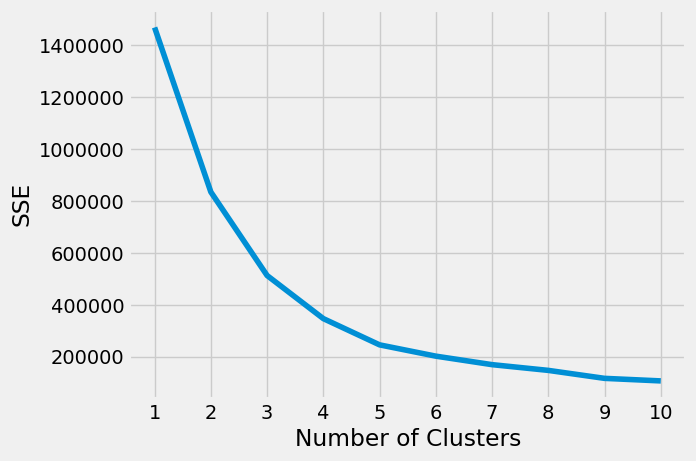

The bin edges for step are [-inf, 186, 372, 558, inf]
The bin edges for amount are [0, 100000, 500000, 1000000, 5000000, 10000000, 80000000]


In [62]:
from sklearn.cluster import KMeans

# This code transforms the continuous variables (step and amount) taking into account ‘isFraud Class’ which is the objective  
# of this research. A k-means cluster model with 3 features, ‘isFraud’, ‘step’ and ‘amount’ is used.
# The variables ‘step_cluster’ and ‘amount_cluster’ are created for every single transaction.

continuous_vars = ['step','amount','isFraud']

# Normalizing the data
normalized_df = (df_sample[continuous_vars] - df_sample[continuous_vars].mean()) / df_sample[continuous_vars].std()

# Determining the optimal number of clusters
kmeans_kwargs = {"init": "random", "n_init": 10, "max_iter": 50, "random_state": 42}
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(normalized_df)
    sse.append(kmeans.inertia_)
    
# Application of th elbow method 
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

# Application of K-Means clustering
kmeans = KMeans(n_clusters=3, **kmeans_kwargs)
kmeans.fit(normalized_df)
clusters = kmeans.predict(normalized_df)

# Using K-Means clustering to create clusters for the continuous variables "step", "amount" while taking "isFraud" into consideration
cluster_df = pd.DataFrame()
for var in continuous_vars:
    cluster_centers = kmeans.cluster_centers_[:, continuous_vars.index(var)]
    col_name = var + '_cluster'
    cluster_df[col_name] = kmeans.predict(normalized_df)
    
    # Replace cluster labels with desired values
    
    # No change is performed on 'isFraud variable'.
    if var == 'isFraud':
        cluster_df[col_name] = cluster_df[col_name].apply(lambda x: 1 if x == 1 else 0)
        
    elif var=='amount':
        bin_edges = [0,100000, 500000, 1000000, 5000000, 10000000, 80000000]
        cluster_labels = ['Low', 'Medium', 'Medium-High', 'High', 'Higher', '10M-80M']
        cluster_df[col_name] = pd.cut(df_sample['amount'], bins=bin_edges, labels=cluster_labels)
        print(f"The bin edges for amount are {bin_edges}")
   
    elif var == 'step':
        bin_edges = [-np.inf, 186, 372, 558, np.inf] 
        cluster_labels = ['1-186', '187-372', '373-558', '559-743']
        cluster_df[col_name] = pd.cut(df_sample['step'], bins=bin_edges, labels=cluster_labels)
        print(f"The bin edges for step are {bin_edges}")

# Create new dataframe to store the converted values
K_means_df = pd.DataFrame()
K_means_df = pd.concat([K_means_df, cluster_df], axis=1)

In [63]:
K_means_df

,step_cluster,amount_cluster,isFraud_cluster
0,1-186,Low,1
1,187-372,Low,1
2,373-558,Low,1
3,187-372,Low,1
4,187-372,Low,1
...,...,...,...
489379,1-186,Medium,0
489380,559-743,Higher,0
489381,187-372,High,0
489382,559-743,Medium,0


In [64]:
K_means_df= pd.concat([df_sample['type'], K_means_df], axis=1)

In [65]:
K_means_df

,type,step_cluster,amount_cluster,isFraud_cluster
0,PAYMENT,1-186,Low,1
1,PAYMENT,187-372,Low,1
2,PAYMENT,373-558,Low,1
3,CASH_OUT,187-372,Low,1
4,CASH_OUT,187-372,Low,1
...,...,...,...,...
489379,CASH_OUT,1-186,Medium,0
489380,TRANSFER,559-743,Higher,0
489381,TRANSFER,187-372,High,0
489382,CASH_OUT,559-743,Medium,0


In [66]:
# Count number of times No fraud occurs in 'isFraud_cluster'
no_fraud_count = K_means_df['isFraud_cluster'].value_counts()[0]

# Print the count
print("Number of times 'No fraud' occurs in 'isFraud_cluster':", no_fraud_count)

Number of times 'No fraud' occurs in 'isFraud_cluster': 140415


In [ ]:
# Count number of times No fraud occurs in 'isFraud_cluster'
no_fraud_count = K_means_df['isFraud_cluster'].value_counts()[1]

# Print the count
print("Number of times 'No fraud' occurs in 'isFraud_cluster':", no_fraud_count)

In [ ]:
cluster_df['amount_cluster'].value_counts()

In [ ]:
# # Get the counts for each cluster label
# amount_cluster_counts = cluster_df['amount_cluster'].value_counts()
# step_cluster_counts = cluster_df['step_cluster'].value_counts()
# isFraud_cluster_counts = cluster_df['isFraud_cluster'].value_counts()

# # Print the counts with labels
# print("Amount cluster counts:")
# print(amount_cluster_counts)

# print("\nStep cluster counts:")
# print(step_cluster_counts)

# print("\nIsFraud cluster counts:")
# print(isFraud_cluster_counts)

In [ ]:
from tabulate import tabulate
from termcolor import colored

# Get the counts for each cluster label
amount_cluster_counts = cluster_df['amount_cluster'].value_counts()
step_cluster_counts = cluster_df['step_cluster'].value_counts()
isFraud_cluster_counts = cluster_df['isFraud_cluster'].value_counts()

# Print the counts with labels
print(colored("Amount cluster counts:", 'blue'))
print(tabulate(amount_cluster_counts.to_frame().T, headers='keys', tablefmt='fancy_grid', numalign='center', stralign='center', colalign=("center",), showindex=False, disable_numparse=True))

print(colored("\nStep cluster counts:", 'blue'))
print(tabulate(step_cluster_counts.to_frame().T, headers='keys', tablefmt='fancy_grid', numalign='center', stralign='center', colalign=("center",), showindex=False, disable_numparse=True))

print(colored("\nIsFraud cluster counts:", 'blue'))
print(tabulate(isFraud_cluster_counts.to_frame().T, headers='keys', tablefmt='fancy_grid', numalign='center', stralign='center', colalign=("center",), showindex=False, disable_numparse=True))


In [ ]:
cluster_counts = pd.Series(clusters).value_counts()
print(cluster_counts)

 np.percentile function to create bins based on percentiles of the amount variable.

In [ ]:
# Determine range of values for "Low" bin
low_bin = pd.Interval(left=kmeans.cluster_centers_[0, continuous_vars.index('amount')] - normalized_df['amount'].std(),
                      right=kmeans.cluster_centers_[0, continuous_vars.index('amount')] + normalized_df['amount'].std())
print(low_bin)

In [ ]:
# Determine range of values for "Medium" bin
medium_bin = pd.Interval(left=kmeans.cluster_centers_[1, continuous_vars.index('amount')] - normalized_df['amount'].std(),
                         right=kmeans.cluster_centers_[1, continuous_vars.index('amount')] + normalized_df['amount'].std())
print(medium_bin)

# Determine range of values for "High" bin
high_bin = pd.Interval(left=kmeans.cluster_centers_[2, continuous_vars.index('amount')] - normalized_df['amount'].std(),
                       right=kmeans.cluster_centers_[2, continuous_vars.index('amount')] + normalized_df['amount'].std())
print(high_bin)

In [ ]:
import pandas as pd

# Convert the categorical columns to boolean values 
df_bool = pd.get_dummies(K_means_df, columns=['type','step_cluster', 'amount_cluster', 'isFraud_cluster'], dtype=bool).astype(int)

# Replace False with 0 and True with 1
df_bool = df_bool.replace({False: 0, True: 1})

# Save the transformed dataset
df_bool.to_csv('fraud_dataset_binary1.csv', index=False)

In [ ]:
df_bool

It is generally recommended to remove redundant rules after mining all the rules and before setting the consequent to "isFraud".

In [ ]:
# import pandas as pd
# from mlxtend.frequent_patterns import apriori
# from mlxtend.frequent_patterns import association_rules

# # Generate frequent itemsets using the Apriori algorithm
# frequent_itemsets = apriori(df_bool, min_support=0.1, use_colnames=True)

# # Generate association rules
# rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# # Print the rules
# for index, rule in rules.iterrows():
#     antecedents = list(rule['antecedents'])
#     consequents = list(rule['consequents'])
#     support = rule['support']
#     confidence = rule['confidence']
#     lift = rule['lift']
    
#     print(f"Rule {index+1}:")
#     print(f"Antecedents: {antecedents}")
#     print(f"Consequents: {consequents}")
#     print(f"Support: {support:.3f}")
#     print(f"Confidence: {confidence:.3f}")
#     print(f"Lift: {lift:.3f}")
#     print("-"*50)
    
# print(f"Number of rules: {len(rules)}")

In [ ]:
# Generate frequent itemsets using the Apriori algorithm
frequent_itemsets = apriori(df_bool, min_support=0.1, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.2)

pd.options.display.max_colwidth = None

# Filter rules that include isFraud_cluster_Fraud in either antecedents or consequents
rules_with_fraud = rules[
    (rules["consequents"].astype(str).str.contains("isFraud_cluster_1"))
]

# Print the filtered rules
for index, row in rules_with_fraud.iterrows():
    print(row.to_string())
    print("\n")

print(f"Total number of rules: {len(rules)}")

# Decrease the font size of the output
from IPython.core.display import HTML
HTML("<style>.output {font-size: 12px;}</style>")

## Derive the frequent itemset

In [ ]:
import itertools
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Generate frequent itemsets using the Apriori algorithm
frequent_itemsets = apriori(df_bool, min_support=0.1, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.2)

# Filter rules that include isFraud_cluster_Fraud in the consequents
rules_with_fraud = rules[
    (rules["consequents"].astype(str).str.contains("isFraud_cluster_1"))
]

# Define a function to check if a rule is a super antecedent of another rule
def is_super_antecedent_rule(rule1, rule2):
    if set(rule1["antecedents"]).issubset(set(rule2["antecedents"])):
        return True
    return False

# Define a function to find all possible sub-antecedents for a given set of items
def find_all_combinations(items):
    combinations = []
    for i in range(1, len(items)):
        combs = itertools.combinations(items, i)
        combinations += [tuple(c) for c in combs]
    return combinations

final_rules = []
for i, rule in rules_with_fraud.iterrows():
    all_combinations = find_all_combinations(rule["antecedents"])
    is_super = False
    for j, r in rules_with_fraud.iterrows():
        if i == j:
            continue
        if is_super_antecedent_rule(rule, r):
            if set(r["antecedents"]).issubset(set(all_combinations)):
                is_super = True
                break
    if not is_super:
        final_rules.append(rule)

# Print the non-redundant rules and their count
print(f"Number of non-redundant rules: {len(final_rules)}")
for i, rule in enumerate(final_rules):
    print(f"Rule {i+1}:")
    print(f"\tAntecedents: {set(rule['antecedents'])}")
    print(f"\tConsequents: {set(rule['consequents'])}")
    print(f"\tSupport: {rule['support']}")
    print(f"\tConfidence: {rule['confidence']}")
    print(f"\tLift: {rule['lift']}")

In [ ]:
# Count number of items in each cluster
cluster_counts = cluster_df.apply(lambda x: x.value_counts()).T.stack()

# Create new dataframe with cluster counts
cluster_counts_df = pd.DataFrame(cluster_counts, columns=['Count']).reset_index()
cluster_counts_df.columns = ['Variable', 'Cluster', 'Count']
cluster_counts_df = cluster_counts_df.sort_values(['Variable', 'Cluster']).reset_index(drop=True)

print(cluster_counts_df)

In [ ]:
# Sort the rules by lift in descending order
rules_sorted = rules_with_fraud.sort_values(by="lift", ascending=False)

# Initialize a list to store the antecedent items of each rule
antecedents_seen = []

# Initialize a list to store the redundant rules
redundant_rules = []

# Iterate through the rules, checking for redundancy
for index, row in rules_sorted.iterrows():
    antecedents = set(row["antecedents"])
    if any(antecedents.issubset(a) for a in antecedents_seen):
        redundant_rules.append(row)
    else:
        antecedents_seen.append(antecedents)

# Print the redundant rules
print("Redundant Rules:")
for index, row in pd.DataFrame(redundant_rules).iterrows():
    print(row.to_string())
    print("\n")

In [ ]:
# Sort the rules by lift in descending order
rules_sorted = rules_with_fraud.sort_values(by="lift", ascending=False)

# Initialize a list to store the antecedent items of each rule
antecedents_seen = []

# Initialize a list to store the redundant rules
redundant_rules = []

# Iterate through the rules, checking for redundancy
for index, row in rules_sorted.iterrows():
    antecedents = set(row["antecedents"])
    if any(antecedents.issubset(a) for a in antecedents_seen):
        redundant_rules.append(row)
        row["is_redundant"] = True
    else:
        antecedents_seen.append(antecedents)
        row["is_redundant"] = False

# Print the redundant rules
print("Redundant Rules:")
for index, row in pd.DataFrame(redundant_rules).iterrows():
    print(row.to_string())
    print("\n")

# Extract the index labels from the redundant rules DataFrame objects and concatenate into a list
redundant_rules_index = [idx for df in redundant_rules for idx in df.index]

# Filter the original rules that are marked as redundant
original_redundant_rules = rules[rules.index.isin(redundant_rules_index)]

# Print the original redundant rules
print("Original Redundant Rules:")
for index, row in original_redundant_rules.iterrows():
    print(row.to_string())
    print("\n")

In [ ]:
# Generate frequent itemsets using the Apriori algorithm
frequent_itemsets = apriori(df_bool, min_support=0.1, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.2)

# Filter rules that include isFraud_cluster_Fraud in either antecedents or consequents
rules_with_fraud = rules[
    (rules["consequents"].astype(str).str.contains("isFraud_cluster_1"))
]

# Sort the rules by lift in descending order
rules_sorted = rules_with_fraud.sort_values(by="lift", ascending=False)

# Initialize a list to store the antecedent items of each rule
antecedents_seen = []

# Initialize a list to store the redundant rules
redundant_rules = []

# Iterate through the rules, checking for redundancy
for index, row in rules_sorted.iterrows():
    antecedents = set(row["antecedents"])
    if any(antecedents.issubset(a) for a in antecedents_seen):
        redundant_rules.append(row)
    else:
        antecedents_seen.append(antecedents)

# Create a dataframe of the original rules
original_rules = rules_sorted[~rules_sorted.index.isin([r.index for r in redundant_rules])]

# Create a dataframe of the redundant rules
redundant_rules = pd.DataFrame(redundant_rules)

# Print the original rules
print("Original Rules:")
rules_styled = rules.style.set_table_styles([{'selector': 'thead', 'props': [('background-color', 'lightblue')]}])
display(rules_styled)

# Filter the original rules that are marked as redundant
original_redundant_rules = rules[rules.index.isin(redundant_rules.index)]

# Print the original redundant rules
print("Original Redundant Rules:")
original_redundant_styled = original_redundant_rules.style.set_table_styles([{'selector': 'thead', 'props': [('background-color', 'lightblue')]}])
display(original_redundant_styled)

In [ ]:
frequent_itemsets

In [ ]:
# Count the number of non-redundant rules
num_non_redundant = len(rules_with_fraud)

# Count the total number of rules
num_total = len(rules)

# Count the number of redundant rules
num_redundant = num_total - num_non_redundant

# Print the result
print(f"Number of redundant rules: {num_redundant}")

By transforming the continuous variables into categorical variables, the author can use them as inputs to a model for predicting the "Fraud class" variable.

In [ ]:
df_sample_subset = df_sample.iloc[:50, :]

In [ ]:
df_sample_subset

## CHAID Algorithm

One way to incorporate the results of your Apriori analysis into a CHAID decision tree is to use the frequent itemsets or association rules as inputs to the decision tree.

For example, you could use the antecedents from the top rules generated by Apriori (e.g. 'time_cluster_morning', 'payment_type_credit_card', 'amount_cluster_high') as inputs to the decision tree, along with other relevant variables. The output variable for the decision tree would still be 'isFraud', as in the Apriori analysis.

In the decision tree, you could split the data based on the presence or absence of each antecedent, and evaluate the resulting proportions of fraud and non-fraud cases in each split. This could help identify which combinations of variables are most predictive of fraud.

Overall, the key is to ensure that the inputs to the decision tree are both relevant to fraud detection and derived from the Apriori analysis. This can help to ensure a logical and coherent flow from the association analysis to the decision tree.






CHAID

CHAID stands for Chi-square Automated Interaction Detection.

The outcome (dependent) variable can be continuous and categorical. But, predictor (independent) variables are categorical variables only (can be more than 2 categories). It can create multiple splits (more than 2).

When independent variables are continuous, they need to be transformed into categorical variables (bins/groups) before using CHAID.

In [ ]:
K_means_df.to_csv('K_means_df.csv', index=False)

In [ ]:
K_means_df.to_csv(r"C:\Users\23059\OneDrive\Desktop\Amiira\Y3S1\fyp\K_means_df.csv", index=False)

In [ ]:
# import pandas as pd

# df = pd.DataFrame({
#     'Gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Female', 'Male'],
#     'Age': ['18-24', '25-34', '18-24', '35-44', '45-54', '25-34', '35-44', '45-54', '55+', '55+'],
#     'Education': ['High School', 'Bachelor', 'High School', 'Master', 'PhD', 'Bachelor', 'Master', 'PhD', 'Bachelor', 'PhD'],
#     'Income': ['Low', 'Low', 'Medium', 'High', 'High', 'Medium', 'High', 'Low', 'Medium', 'Low'],
#     'Purchased': ['No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes']
# })

# print(df)

In [67]:
# Check the data types of columns
print(K_means_df.dtypes)

# Change data types to object
K_means_df = K_means_df .astype('object')

# Check the data types of columns after conversion
print(K_means_df .dtypes)

type                 object
step_cluster       category
amount_cluster     category
isFraud_cluster       int64
dtype: object
type               object
step_cluster       object
amount_cluster     object
isFraud_cluster    object
dtype: object


In [108]:
K_means_df2=K_means_df.iloc[:400000]
K_means_df2

,type,step_cluster,amount_cluster,isFraud_cluster
0,PAYMENT,1-186,Low,Fraud
1,PAYMENT,187-372,Low,Fraud
2,PAYMENT,373-558,Low,Fraud
3,CASH_OUT,187-372,Low,Fraud
4,CASH_OUT,187-372,Low,Fraud
...,...,...,...,...
399995,TRANSFER,373-558,High,0
399996,CASH_OUT,187-372,Medium-High,0
399997,CASH_OUT,1-186,High,0
399998,TRANSFER,373-558,Low,0


In [109]:
import pandas as pd

# Assuming your dataframe is named "df"
K_means_df2["isFraud_cluster"] = K_means_df2["isFraud_cluster"].replace({0: "NoFraud", 1: "Fraud"})

C:\Users\23059\anaconda3\envs\test2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [110]:
K_means_df2

,type,step_cluster,amount_cluster,isFraud_cluster
0,PAYMENT,1-186,Low,Fraud
1,PAYMENT,187-372,Low,Fraud
2,PAYMENT,373-558,Low,Fraud
3,CASH_OUT,187-372,Low,Fraud
4,CASH_OUT,187-372,Low,Fraud
...,...,...,...,...
399995,TRANSFER,373-558,High,NoFraud
399996,CASH_OUT,187-372,Medium-High,NoFraud
399997,CASH_OUT,1-186,High,NoFraud
399998,TRANSFER,373-558,Low,NoFraud


In [111]:
# from chefboost import Chefboost as chef
# import pandas as pd

# config = {'algorithm': 'CHAID','min_samples_split': 2,'learning_rate':0.1,'enableParallelism': False}
# model = chef.fit(K_means_df2, config = config, target_label = 'isFraud_cluster')
# print(model)

CHAID  tree is going to be built...
-------------------------
finished in  7.238723993301392  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  91.717 % on  400000  instances
Labels:  ['Fraud' 'NoFraud']
Confusion matrix:  [[342331, 26494], [6638, 24537]]
Precision:  92.8166 %, Recall:  98.0978 %, F1:  95.3842 %
{'trees': [<module 'outputs/rules/rules' from 'C:\\Users\\23059\\OneDrive\\Desktop\\FinalYearProject\\outputs/rules/rules.py'>], 'alphas': [], 'config': {'algorithm': 'CHAID', 'min_samples_split': 2, 'learning_rate': 0.1, 'enableParallelism': False, 'enableRandomForest': False, 'num_of_trees': 5, 'enableMultitasking': False, 'enableGBM': False, 'epochs': 10, 'max_depth': 3, 'enableAdaboost': False, 'num_of_weak_classifier': 4, 'num_cores': 4}, 'nan_values': []}


In [101]:
from chefboost import Chefboost as chef
import pandas as pd

config = {'algorithm': 'CHAID','min_samples_split': 2,'learning_rate':0.1,'enableParallelism': True,'enableRandomForest':True}
model = chef.fit(K_means_df1, config = config, target_label = 'isFraud_cluster')
print(model)

CHAID  tree is going to be built...
-------------------------
finished in  0.23870444297790527  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  100.0 % on  20  instances
Labels:  ['Fraud']
Confusion matrix:  [[20]]
Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %
{'trees': [<module 'outputs/rules/rules' from 'C:\\Users\\23059\\OneDrive\\Desktop\\FinalYearProject\\outputs/rules/rules.py'>], 'alphas': [], 'config': {'algorithm': 'CHAID', 'min_samples_split': 2, 'learning_rate': 0.1, 'enableParallelism': False, 'enableRandomForest': False, 'num_of_trees': 5, 'enableMultitasking': False, 'enableGBM': False, 'epochs': 10, 'max_depth': 3, 'enableAdaboost': False, 'num_of_weak_classifier': 4, 'num_cores': 4}, 'nan_values': []}


In [ ]:
# Predict for all rows in the test data
predictions = []
TP = 0  # True Positives
FP = 0  # False Positives
TN = 0  # True Negatives
FN = 0  # False Negatives

for i in range(len(test_data)):
    test_instance = test_data.iloc[i]
    prediction = chef.predict(model, test_instance)
    predictions.append(prediction)

   # Compare the prediction with the actual target value
    if prediction == "Fraud" and y_test.iloc[i] == "Fraud":
        TP += 1
    elif prediction == "Fraud" and y_test.iloc[i] == "No_Fraud":
        FP += 1
    elif prediction == "No_Fraud" and y_test.iloc[i] == "No_Fraud":
        TN += 1
    elif prediction == "No_Fraud" and y_test.iloc[i] == "Fraud":
        FN += 1

# Print the predictions
print(predictions)

# Print the counts for TP, FP, TN, and FN
print("True Positives (TP):", TP)
print("False Positives (FP):", FP)
print("True Negatives (TN):", TN)
print("False Negatives (FN):", FN)

# Calculate precision
precision = TP / (TP + FP)

# Calculate recall
recall = TP / (TP + FN)

# Calculate F1 score
f1_score = 2 * (precision * recall) / (precision + recall)

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

In [ ]:
from sklearn.model_selection import train_test_split

# assume your data is in a pandas DataFrame called 'data'
# and the target variable is called 'target'

X = K_means_df.drop('isFraud_cluster', axis=1) # drop the target column
y = K_means_df['isFraud_cluster'] # set the target column as the target variable

# split the data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# assume X_train and y_train are already defined
train_df = pd.concat([X_train, y_train], axis=1)
train_df

In [ ]:
K_means_df['isFraud_cluster'].replace({0: 'NoFraud', 1: 'Fraud'}, inplace=True)
K_means_df